# Analysis of the dynamics of contributions

In this notebook, we study how the contributions on a set of pages evolve over time. The dataset is compose of one percent of the articles of the english wikipedia randomnly chosen.

To study the articles we will used a few parameters: Importance, Quality, revisions, pageviews.
In wikipedia the articles are ranked by importance and quality; see http://en.wikipedia.org/wiki/Wikipedia:Version_1.0_Editorial_Team/Assessment. The difference value for importance are: Top=4, High=3, Mid=2, Low=1, ???=0 and for the quality: Featured-class=6, A-class and GA-class=5, B-class=4, C-class=3, start-class=2, stub-class=1. The pageviews are obtained using the api: http://stats.grok.se/ .

In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline
%config InlineBackend.figure_formats=['svg']

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML


dataset_dir_name = 'onepercent'
stats_dir_name = '%s/stats' % (dataset_dir_name)
basic_stats_file_name = '%s/basic_stats.csv' % stats_dir_name

df_basic_stats = pd.DataFrame()
df_basic_stats = df_basic_stats.from_csv(basic_stats_file_name, encoding="utf-8")  
df_basic_stats = df_basic_stats.fillna(0)

#Profile of the dataset

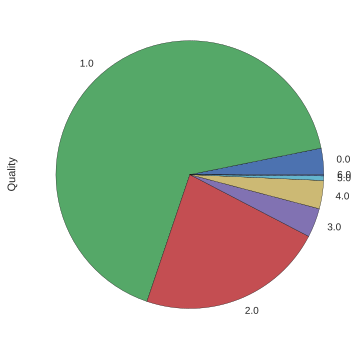

In [2]:
counts = df_basic_stats.groupby(df_basic_stats["Quality"])
counts = counts.aggregate(len)
counts.head(5)
series = counts["Length"]
series.name='Quality'
series.head(10)
series.plot(kind='pie',figsize=(6, 6))

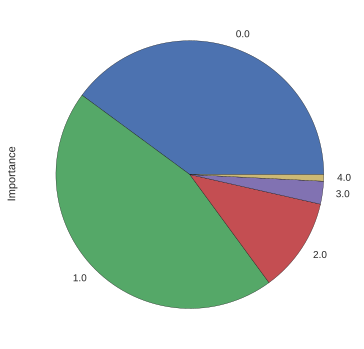

In [3]:
counts = df_basic_stats.groupby(df_basic_stats["Importance"])
counts = counts.aggregate(len)
counts.head(5)
series = counts["Length"]
series.name='Importance'
series.head(10)
series.plot(kind='pie',figsize=(6, 6))

## Changes in the number of contributions from one year to the other.

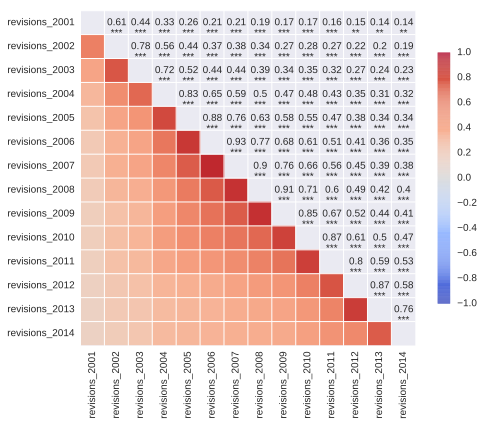

In [4]:
indexes = ['revisions_2001','revisions_2002','revisions_2003',
           'revisions_2004','revisions_2005','revisions_2006',
           'revisions_2007','revisions_2008','revisions_2009',
           'revisions_2010','revisions_2011','revisions_2012',
           'revisions_2013','revisions_2014']

f, ax = plt.subplots(figsize=(8, 6))
sns.corrplot(df_basic_stats[indexes],diag_names=False)
plt.show()

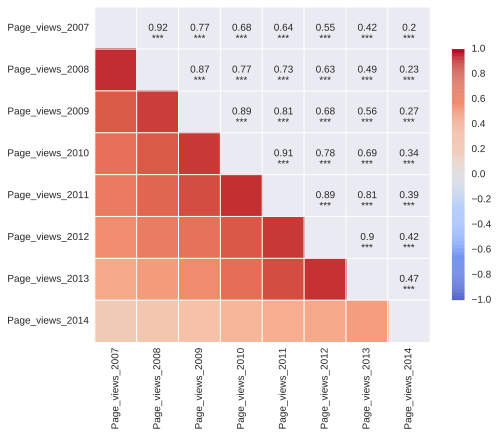

In [5]:
indexes = ['Page_views_2007','Page_views_2008','Page_views_2009',
           'Page_views_2010','Page_views_2011','Page_views_2012',
           'Page_views_2013','Page_views_2014']

f, ax = plt.subplots(figsize=(8, 6))
sns.corrplot(df_basic_stats[indexes],diag_names=False)
plt.show()

We can see that the change of contributions and pageviews from one year to the other is very limited and the value are highly corrolated. Over a period of a few year, those value does not corrolated as well.

# Evolution

In this section, we partition the pages used the quality and the importance they reached in 2015. We then look at how the contributions to those group evolve over time. 

In [6]:
importance_file_name = '%s/importance_stats.csv' % stats_dir_name

df_importance = pd.DataFrame()
df_importance = df_importance.from_csv(importance_file_name, encoding="utf-8")
df_importance = df_importance.fillna(0)


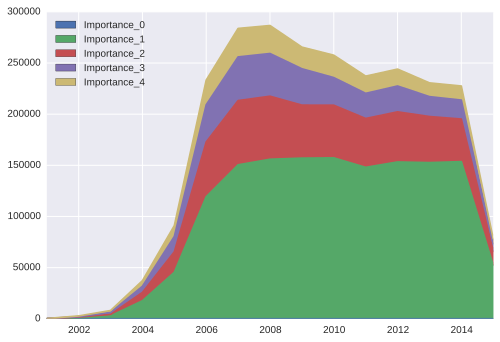

In [7]:
df_importance.plot(kind='area',sort_columns=True)

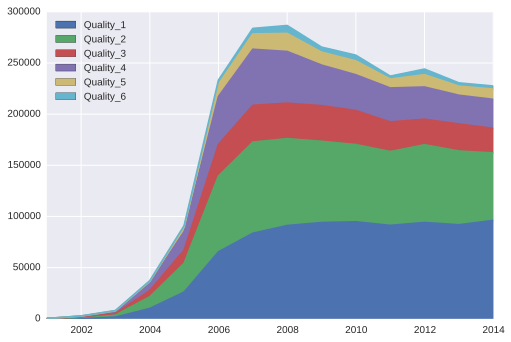

In [8]:
quality_file_name = '%s/quality_stats.csv' % stats_dir_name

df_quality = pd.DataFrame()
df_quality = df_quality.from_csv(quality_file_name, encoding="utf-8")
df_quality = df_quality.fillna(0)

df_quality.plot(kind='area',sort_columns=True)

We see that the number of contributions a pages rec